In [1]:
import numpy as np
from sys import path

path.append('/home/sasamb4ikk/sber/AmericanOptionsPricingApproaches/src')
from samplers import WienerRainbowPutOptionSampler, GeometricBrownianMotionPutSampler
from american_monte_carlo import PricerAmericanMonteCarlo
from basis_functions import PolynomialTransformer
import matplotlib.pyplot as plt
from BinomialTree import price_gbm_put


In [2]:
%load_ext autoreload
%autoreload 2

# Rainbow Wiener 2-dimensional

In [10]:
sampler = WienerRainbowPutOptionSampler(
    cnt_trajectories=1_000_000,
    cnt_times=3,
    t=1,
    time_grid = None,
    seed = 345,
    sigmas = [1., 1.],
    strike=0.
)

sampler.sample()

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

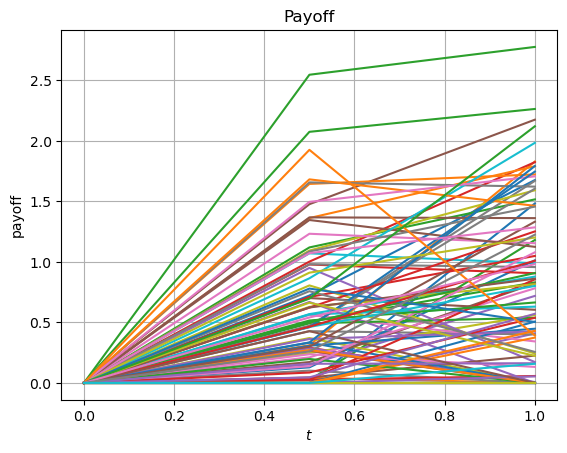

In [11]:
sampler.plot(100)

In [12]:
in_the_money_indices = np.where(sampler.payoff[:, 1] > 1e-9)[0]
len(in_the_money_indices)

749942

In [13]:
features = sampler.markov_state[in_the_money_indices, 1]
transformed = PolynomialTransformer(5).fit_transform(features)
transformed.shape

(749942, 21)

In [14]:
regularization = np.eye(transformed.shape[1], dtype=float) * 0.
inv = np.linalg.pinv((transformed.T @ transformed + regularization), rcond=1e-4)
weights = inv @ transformed.T @ sampler.payoff[in_the_money_indices, 2]
continuation_value = transformed @ weights

In [15]:
indicator = (continuation_value < sampler.payoff[in_the_money_indices, 1])
indicator.sum()

1109

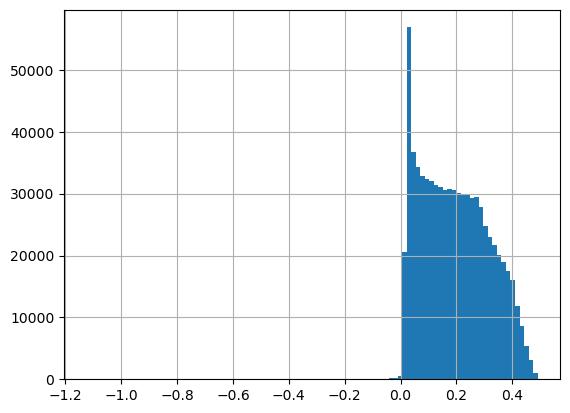

In [16]:
plt.hist(continuation_value - sampler.payoff[in_the_money_indices, 1], bins=100);
plt.grid()

In [2]:
amc = PricerAmericanMonteCarlo(
    sampler=WienerRainbowPutOptionSampler(
        cnt_trajectories=1_000_000,
        cnt_times=30,
        t=1,
        time_grid = None,
        seed = 345,
        sigmas = [1., 1.],
        strike=0.
    ),
    regularization_alpha=1e-4
)

 97%|#########6| 28/29 [00:03<00:00,  9.26it/s]

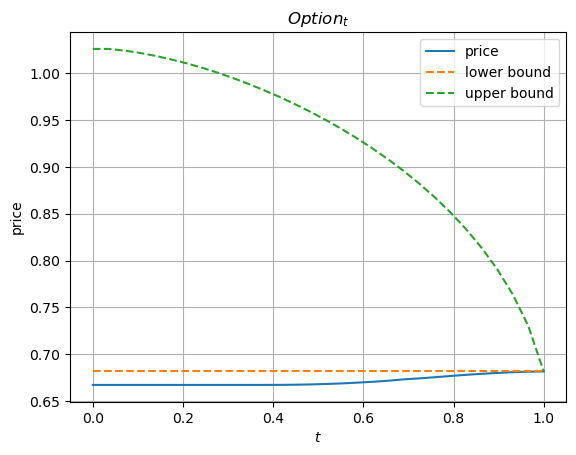

/home/sasamb4ikk/sber/AmericanOptionsPricingApproaches/src/abstracts.py:45: UserWarning: We cannot plot >=2d processes
  warnings.warn("We cannot plot >=2d processes")


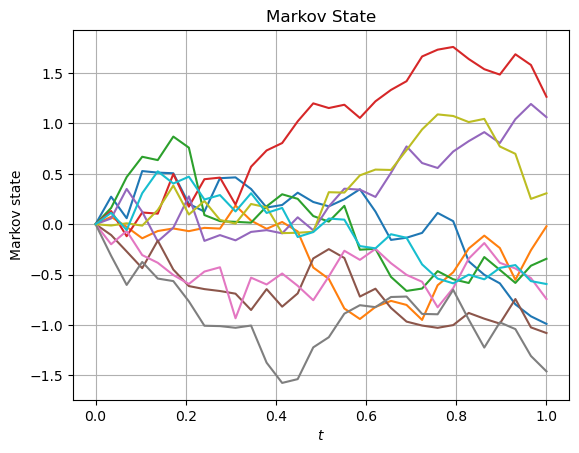

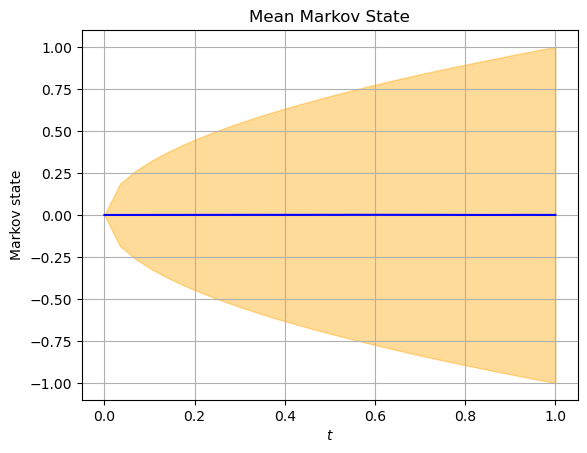

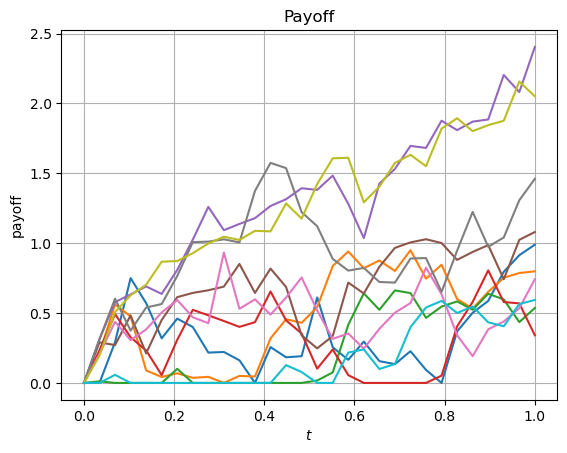

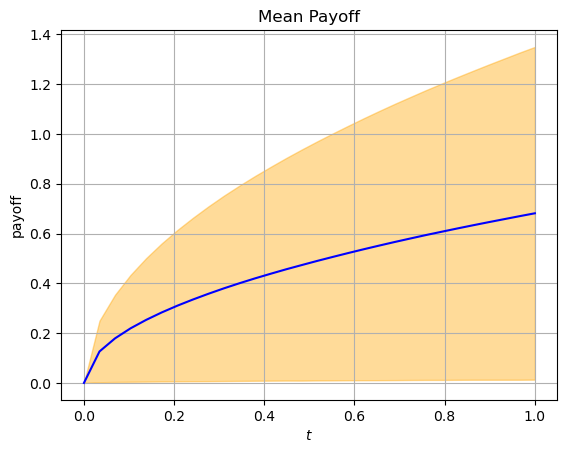

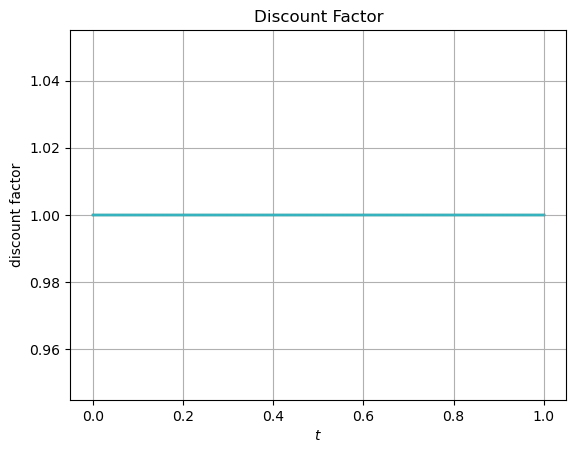

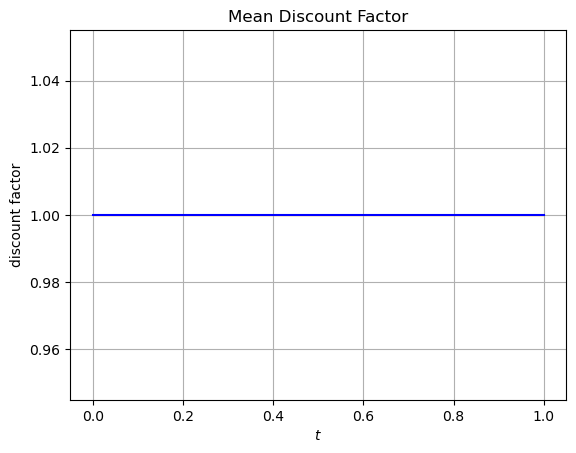

[0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671358834608613,
 0.6671792240298596,
 0.6673425494011413,
 0.6676819501670815,
 0.6681452995747887,
 0.6687523379716842,
 0.6695771152492019,
 0.6704850159081243,
 0.6716333867156102,
 0.673040587452447,
 0.6741430865010946,
 0.6753764764514661,
 0.6766592511411483,
 0.6779137611946875,
 0.6789973450308103,
 0.6799350323396819,
 0.6807266695725499,
 0.6812867533798435,
 0.6814759882666009]

In [3]:
amc.price(
    test=False,
    quiet=False
)

 55%|#####5    | 16/29 [00:00<00:00, 158.21it/s]

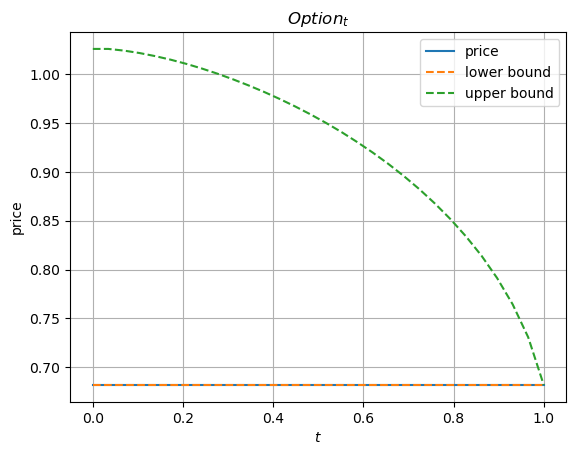

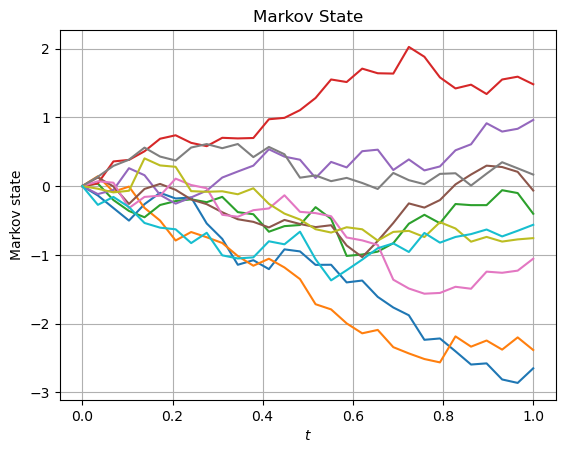

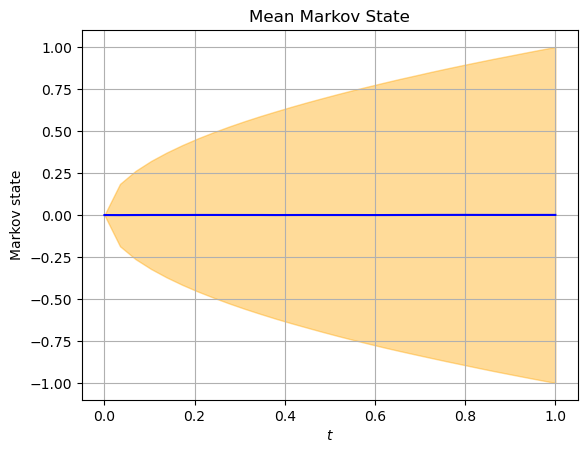

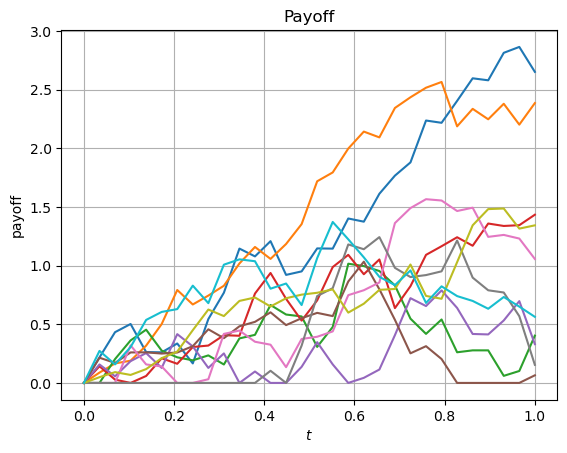

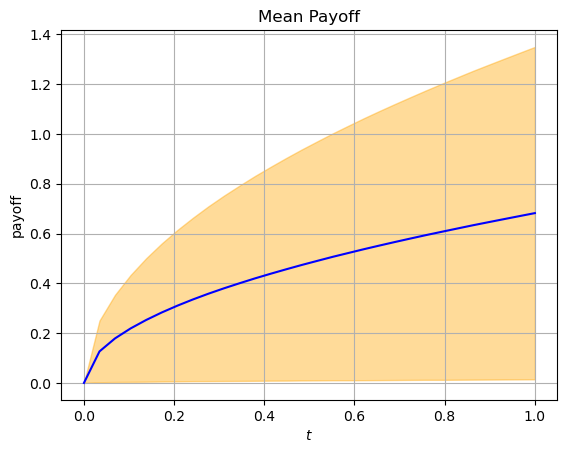

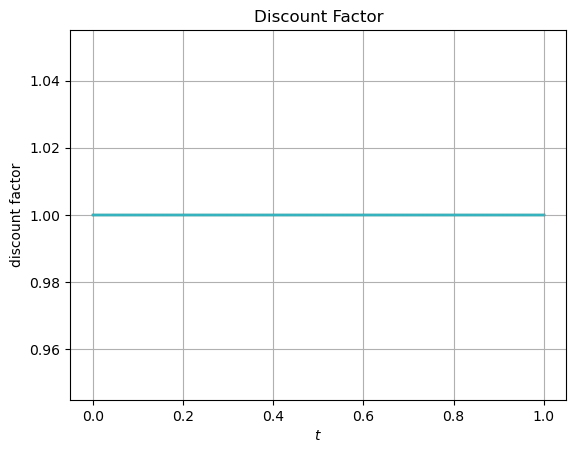

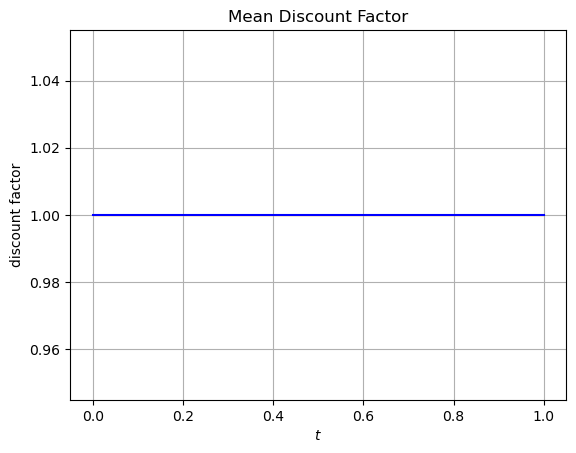

[0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767,
 0.6820534005572767]

In [5]:
amc.price(
    test=True,
    quiet=False
)

# GBM put

In [4]:
option_params = {
    "asset0": 100.,
    "sigma": 0.1,
    "mu": 0.,
    "strike": 100.,
    "t": 1
}

## Tree

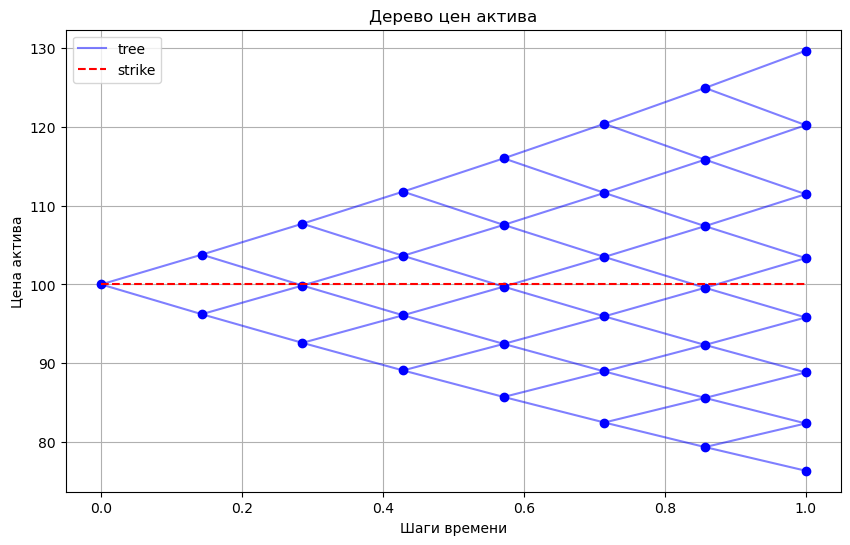

[ 0.          0.          0.          2.09467081  7.67715887 14.39885301
 20.63116476]
[ 0.          0.          1.04733069  4.88590228 11.03799081 17.51499486]
[ 0.          0.52366299  2.96660785  7.9619327  14.27647827]
[ 0.26183032  1.74512992  5.46425904 11.11919128]
[1.00347678 3.60468611 8.29171243]
[2.30407559 5.94818873]
[4.12612396]


In [22]:
cashflows, price_history = price_gbm_put(
    **option_params,
    cnt_times=8
)

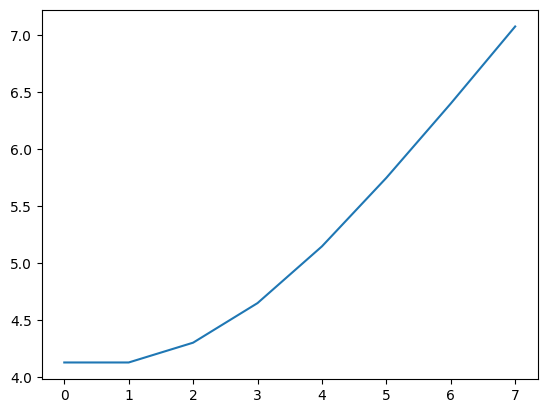

In [27]:
plt.plot(price_history)

## AMC

In [7]:
amc = PricerAmericanMonteCarlo(
    sampler = GeometricBrownianMotionPutSampler(
        cnt_trajectories = 1_000_000,
        cnt_times = 30,
        seed = 345,
        **option_params
    ),
    regularization_alpha = 1e-3
)

 93%|#########3| 27/29 [00:01<00:00, 24.77it/s]

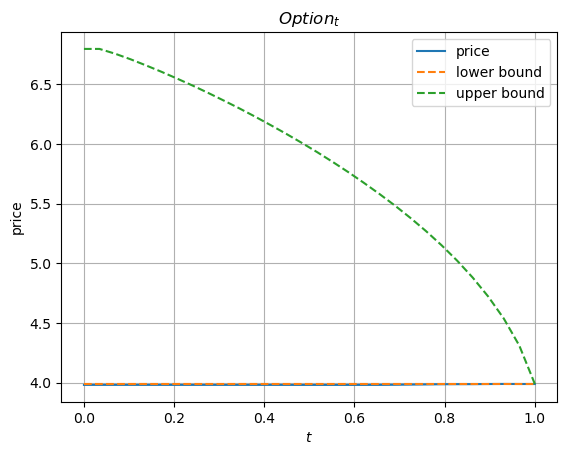

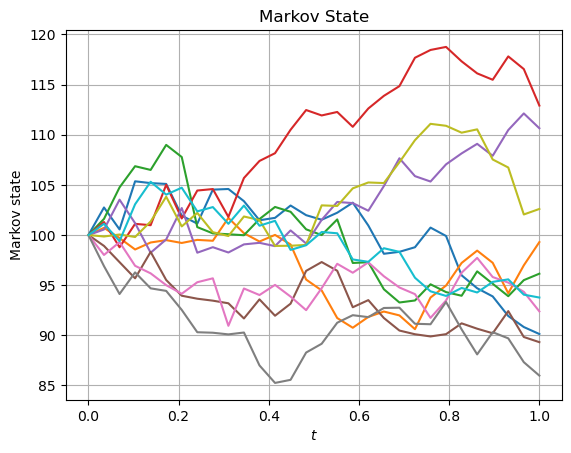

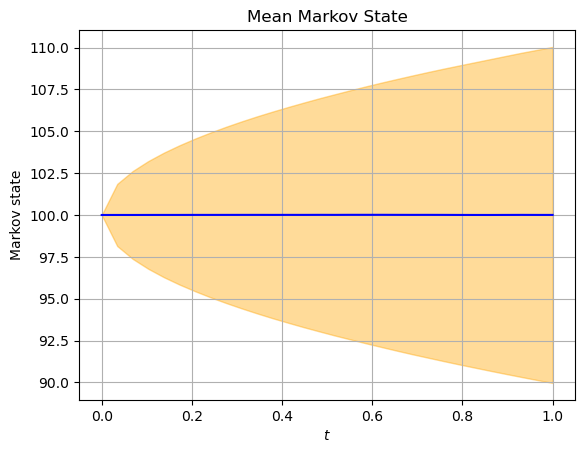

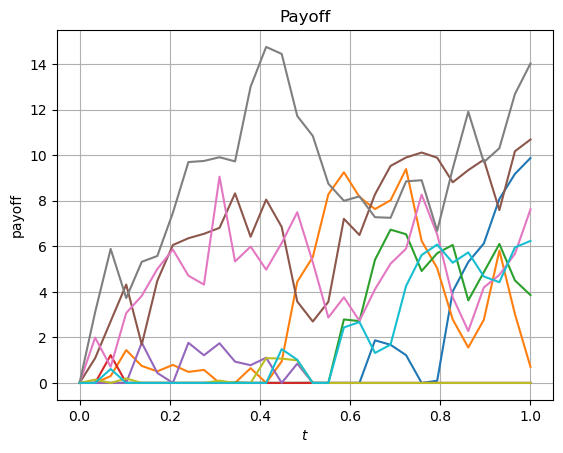

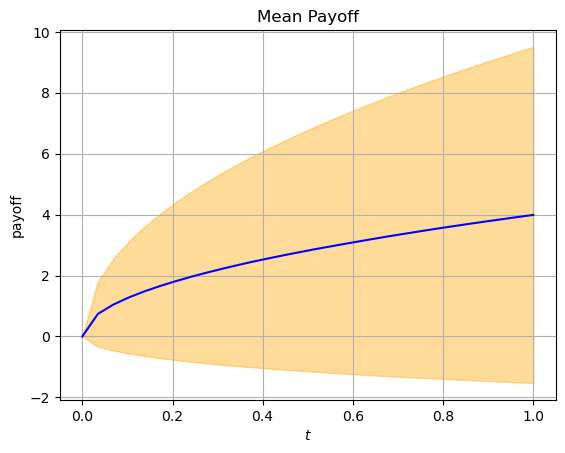

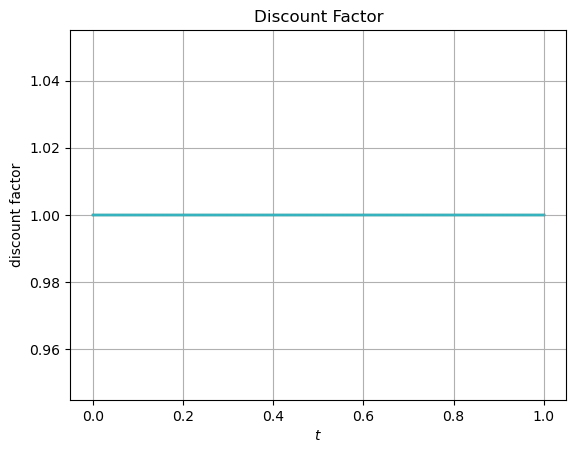

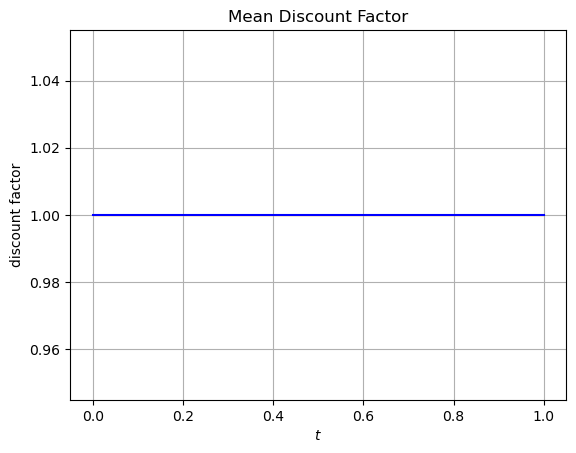

[3.9821493182824814,
 3.9821493182824814,
 3.9821493182824814,
 3.9821493182824814,
 3.9821493182824814,
 3.9821493182824814,
 3.9821493182824814,
 3.9821493182824814,
 3.982126378159507,
 3.982076939258571,
 3.982076939258571,
 3.982068275067874,
 3.982096807592872,
 3.982089903860519,
 3.981846660479115,
 3.981835443940499,
 3.9819076180498865,
 3.9819368881699773,
 3.9819475529769903,
 3.9821146123724858,
 3.9831048291941005,
 3.9845744934304808,
 3.9858332636612888,
 3.9874677426560665,
 3.9880661844985785,
 3.988250189852163,
 3.9892907149269896,
 3.9899116111318267,
 3.9895034360499046,
 3.989474313436392]

In [8]:
amc.price(
    test=False,
    quiet=False
)

 55%|#####5    | 16/29 [00:00<00:00, 153.54it/s]

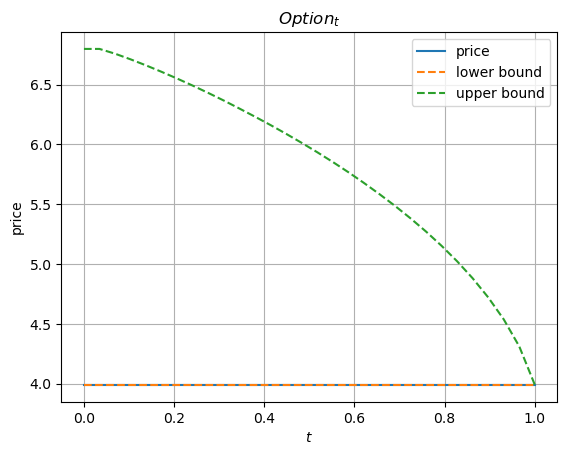

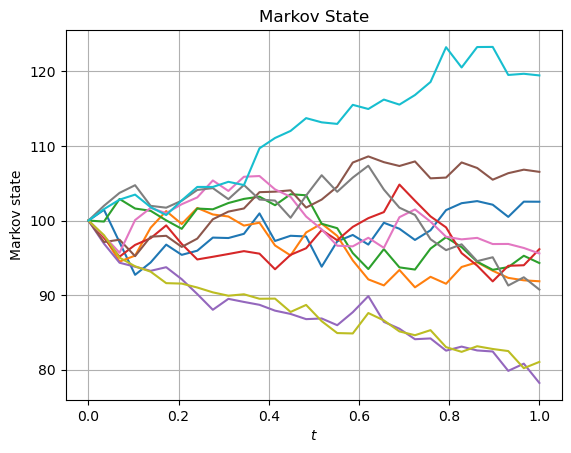

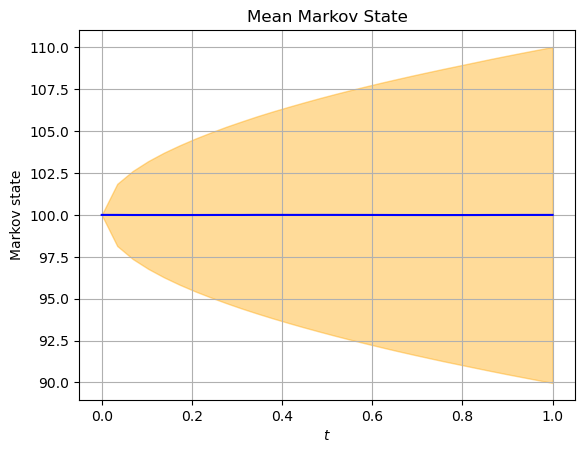

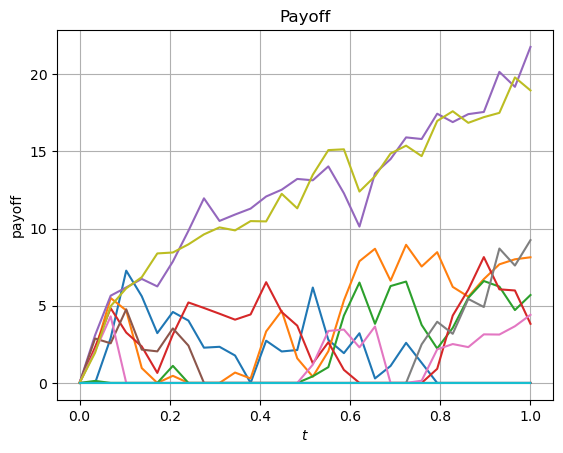

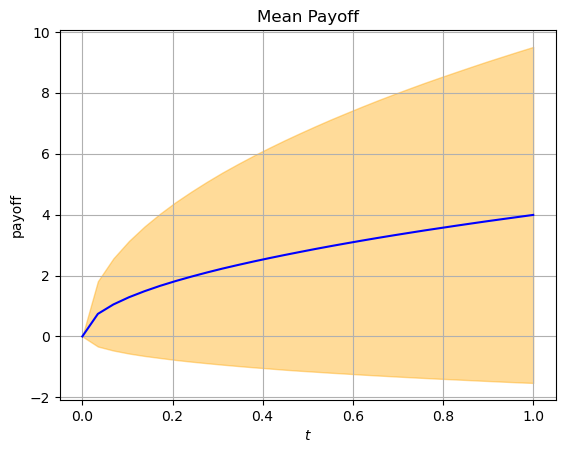

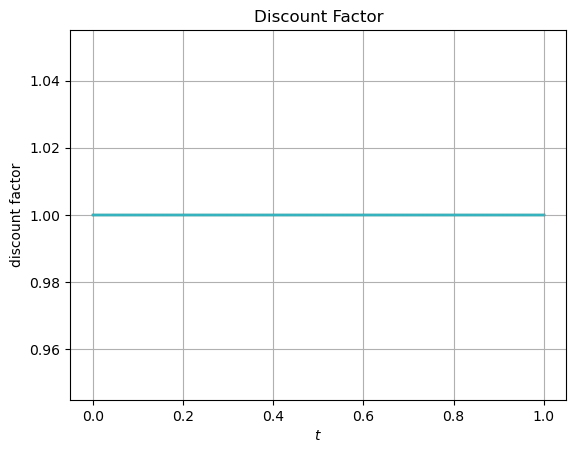

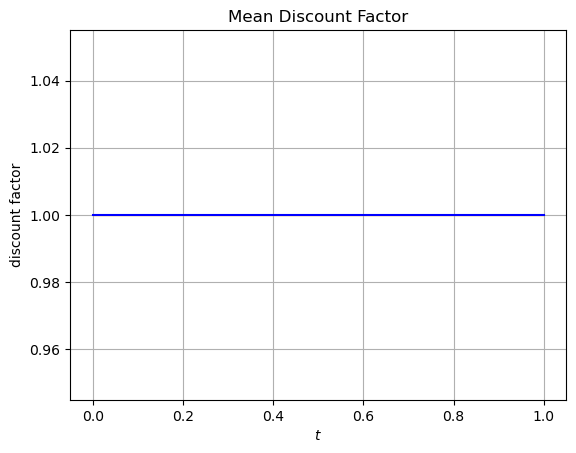

[3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493,
 3.9891347390864493]

In [9]:
amc.price(
    test=True,
    quiet=False
)